<a href="https://colab.research.google.com/github/KyleLopin/MLClass/blob/main/rice_leaf_problem_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/KyleLopin/MLClass.git
%cd MLClass

Cloning into 'MLClass'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 11.49 MiB | 22.58 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/MLClass/MLClass


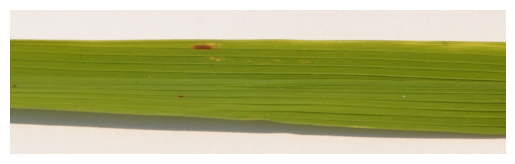

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display an image
img = Image.open("rice_leaf.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

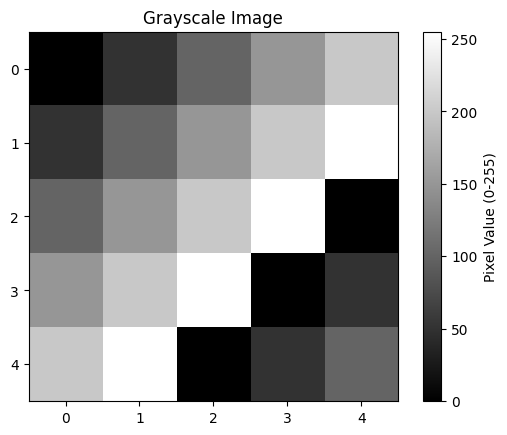

In [5]:
# explain how pixels work
import numpy as np
import matplotlib.pyplot as plt

# Create a 5x5 grayscale image (values 0-255)
grayscale_image = np.array([
    [0, 50, 100, 150, 200],
    [50, 100, 150, 200, 255],
    [100, 150, 200, 255, 0],
    [150, 200, 255, 0, 50],
    [200, 255, 0, 50, 100]
], dtype=np.uint8)

# Display the image
plt.imshow(grayscale_image, cmap='gray')
plt.colorbar(label='Pixel Value (0-255)')
plt.title("Grayscale Image")
plt.show()


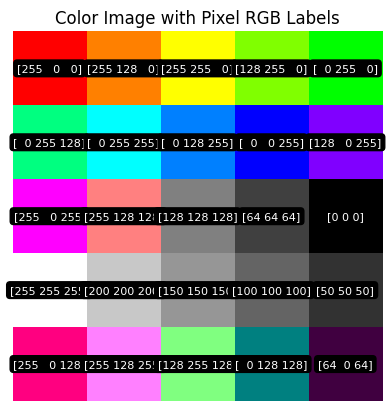

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 5x5 color image (RGB values)
color_image = np.array([
    [[255, 0, 0], [255, 128, 0], [255, 255, 0], [128, 255, 0], [0, 255, 0]],  # Red to Green
    [[0, 255, 128], [0, 255, 255], [0, 128, 255], [0, 0, 255], [128, 0, 255]],  # Green to Blue
    [[255, 0, 255], [255, 128, 128], [128, 128, 128], [64, 64, 64], [0, 0, 0]],  # Purple to Black
    [[255, 255, 255], [200, 200, 200], [150, 150, 150], [100, 100, 100], [50, 50, 50]],  # White to Gray
    [[255, 0, 128], [255, 128, 255], [128, 255, 128], [0, 128, 128], [64, 0, 64]],  # Mixed colors
], dtype=np.uint8)

# Display the image
fig, ax = plt.subplots()
ax.imshow(color_image)
ax.set_title("Color Image with Pixel RGB Labels")
ax.axis("off")

# Add labels to each pixel
rows, cols, _ = color_image.shape
for i in range(rows):
    for j in range(cols):
        rgb = color_image[i, j]
        ax.text(j, i, f"{rgb}", color="white", fontsize=8, ha="center", va="center",
                bbox=dict(boxstyle="round,pad=0.3", facecolor="black"))

plt.show()


Middle 5x5 pixels:
[[[101 110   1]
  [102 111   2]
  [102 111   2]
  [103 112   3]
  [103 112   3]]

 [[107 116   7]
  [105 114   5]
  [105 114   5]
  [109 118  11]
  [112 121  14]]

 [[119 128  19]
  [118 127  18]
  [118 127  18]
  [121 130  23]
  [123 132  25]]

 [[122 131  24]
  [123 132  25]
  [124 133  26]
  [125 134  27]
  [126 135  28]]

 [[117 126  19]
  [120 129  22]
  [122 131  24]
  [122 131  24]
  [121 130  23]]]


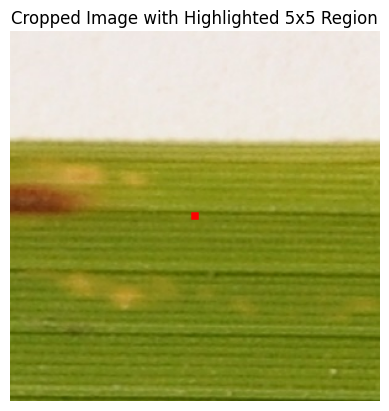

In [21]:
from PIL import ImageDraw
import numpy as np
import matplotlib.pyplot as plt

# Open the existing image
img = Image.open("rice_leaf.jpg")

# Get the original dimensions of the image
original_width, original_height = img.size

# Define the middle crop dimensions
top, bottom = 100, 400
left, right = 1200, 1500

# Crop the image
img_cropped = img.crop((left, top, right, bottom))

# Convert the cropped image to a NumPy array
img_array = np.array(img_cropped)

# Find the center of the cropped image
height, width, _ = img_array.shape
center_y, center_x = height // 2, width // 2

# Define the boundaries of the 5x5 box
box_size = 5
start_y, end_y = 147, 152
start_x, end_x = 147, 152

# Extract the middle 5x5 pixels
middle_pixels = img_array[start_y:end_y, start_x:end_x]
print("Middle 5x5 pixels:")
print(middle_pixels)

# Draw a box on the cropped image
draw = ImageDraw.Draw(img_cropped)
draw.rectangle([start_x, start_y, end_x, end_y], outline="red", width=3)

# Display the cropped image with the box
plt.imshow(img_cropped)
plt.title("Cropped Image with Highlighted 5x5 Region")
plt.axis("off")
plt.show()

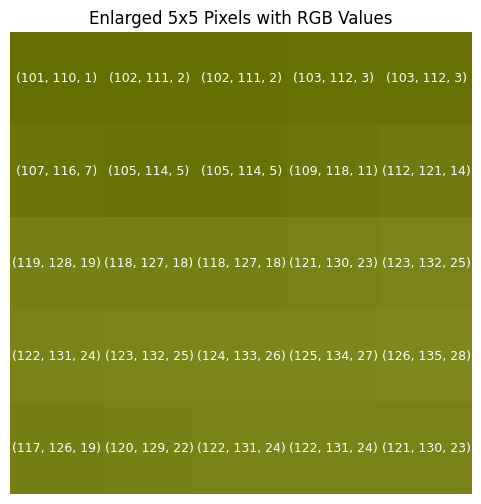

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Enlarge the image by scaling up each pixel
scale_factor = 100  # Size of each block in pixels
enlarged_image = np.kron(middle_pixels, np.ones((scale_factor, scale_factor, 1), dtype=np.uint8))

# Plot the enlarged image
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(enlarged_image)
ax.axis('off')

# Overlay RGB values on each block
rows, cols, _ = middle_pixels.shape
for i in range(rows):
    for j in range(cols):
        # Calculate the center position of each block
        x = (j + 0.5) * scale_factor
        y = (i + 0.5) * scale_factor
        # Overlay text
        rgb_text = str(tuple(middle_pixels[i, j]))
        ax.text(x, y, rgb_text, color="white", ha="center", va="center",
                fontsize=9)

plt.title("Enlarged 5x5 Pixels with RGB Values")
plt.show()


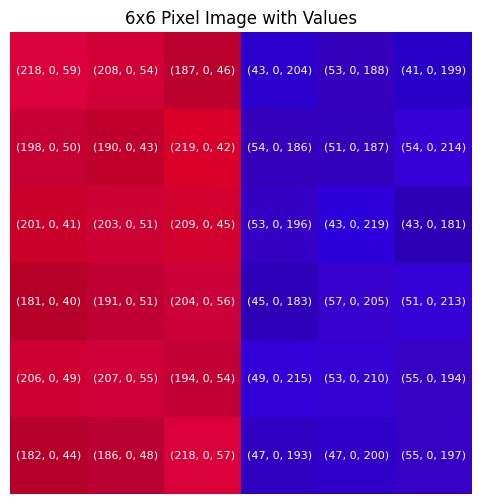

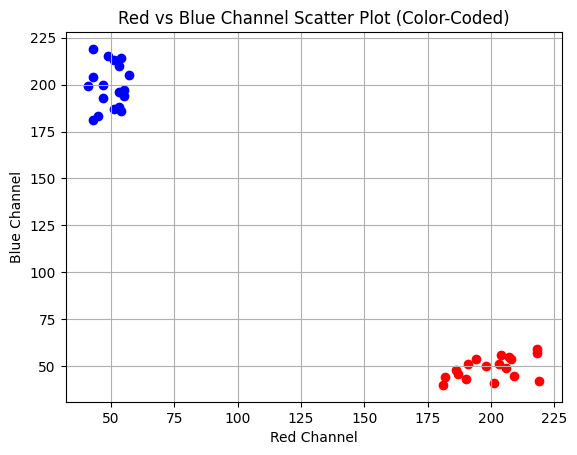

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 6x6 pixel image with variation
np.random.seed(42)  # For reproducibility

# Redish pixels: High red, low blue, with noise
redish = np.array([[[200 + np.random.randint(-20, 20), 0, 50 + np.random.randint(-10, 10)] for _ in range(3)] for _ in range(6)])

# Blueish pixels: Low red, high blue, with noise
blueish = np.array([[[50 + np.random.randint(-10, 10), 0, 200 + np.random.randint(-20, 20)] for _ in range(3)] for _ in range(6)])

# Combine redish and blueish into a 6x6 image
image = np.hstack((redish, blueish)).astype(np.uint8)

# Display the image with pixel values
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)
ax.axis("off")
ax.set_title("6x6 Pixel Image with Values")

# Add pixel values as text
rows, cols, _ = image.shape
for i in range(rows):
    for j in range(cols):
        rgb = tuple(image[i, j])  # Get RGB values
        ax.text(j, i, f"{rgb}", color="white", ha="center",
                va="center", fontsize=8)

plt.show()

# scatter plot redish points
plt.scatter(redish[:, :, 0].flatten(), redish[:, :, 2].flatten(),
            color='red', label='Redish')
# plot blueish points
plt.scatter(blueish[:, :, 0].flatten(), blueish[:, :, 2].flatten(),
            color='blue', label='Blueish')
plt.xlabel("Red Channel")
plt.ylabel("Blue Channel")
plt.title("Red vs Blue Channel Scatter Plot (Color-Coded)")
plt.grid()
plt.show()


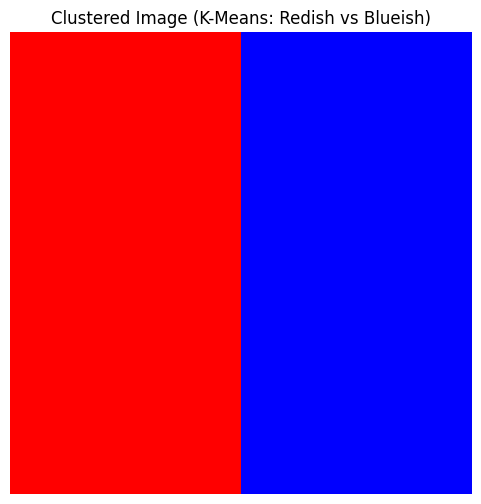

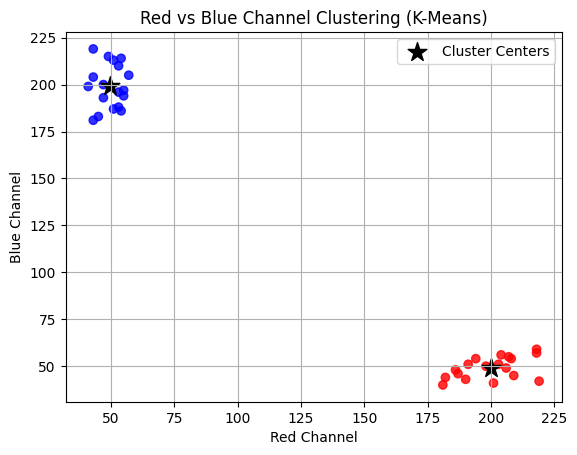

In [49]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Flatten the image data for clustering (pixels as rows, RGB as columns)
pixels = image.reshape(-1, 3)

# Perform K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pixels)

# Assign each pixel to a cluster
labels = kmeans.labels_

# Map clusters to colors: 0 -> red, 1 -> blue
cluster_colors = np.zeros_like(pixels)
for i, label in enumerate(labels):
    cluster_colors[i] = [255, 0, 0] if label == 0 else [0, 0, 255]  # Redish for 0, Blueish for 1

# Reshape back into image shape
clustered_image = cluster_colors.reshape(image.shape)

# Display the clustered image
plt.figure(figsize=(6, 6))
plt.imshow(clustered_image.astype(np.uint8))
plt.axis("off")
plt.title("Clustered Image (K-Means: Redish vs Blueish)")
plt.show()

# Visualize the clusters in feature space (Red vs Blue)
plt.scatter(pixels[:, 0], pixels[:, 2], c=["red" if label == 0 else "blue" for label in labels], alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
            color="black", s=200, label="Cluster Centers",
            marker='*')
plt.xlabel("Red Channel")
plt.ylabel("Blue Channel")
plt.title("Red vs Blue Channel Clustering (K-Means)")
plt.legend()
plt.grid()
plt.show()


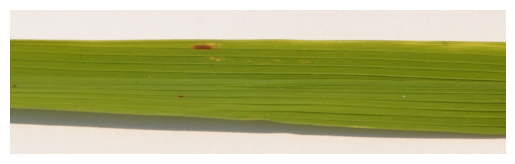

In [50]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display an image
img = Image.open("rice_leaf.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()